<style>
#toc ol {
  counter-reset: item;
  list-style-type: none;
  padding-left: 1.2em;
}
#toc li {
  display: block;
}
#toc li:before {
  content: counters(item, ".") " ";
  counter-increment: item;
}
</style>

<div id="toc">
  <h2>Sumário</h2>
  <ol>
    <li><a href="#modelos">Modelos matemáticos de canais de comunicação sem fio</a></li>
    <li>
      <a href="#analise">Análise de sinais determinísticos e aleatórios</a>
      <ol>
        <li><a href="#21-passabaixas">Equivalente passa-baixas</a></li>
        <li><a href="#22-espacos">Espaços vetoriais e Sinais</a></li>
      </ol>
    </li>
  </ol>
</div>

<div style="page-break-after: always;">

<a id="modelos"></a>
# 1. Modelos matemáticos de canais de comunicação sem fio

## Canais AWGN

No contexto de comunicações digitais, os sinais em radiofrequência são transmitidos pelo ar livre, que pode ser modelado como um canal com ruído gaussiano branco aditivo (AWGN), de modo que no receptor, o sinal recebido $r(t)$, em geral é representado como a soma do sinal transmitido $s(t)$ atenuado por um fator $\alpha$ com uma amplitude, ou ruído, $n$ que possui uma distribuição de probabilidades gaussina:

$$r(t) = \alpha s(t) + n(t)$$

### Canais AWGN com Limitação de Banda Passante

Em um canal AWGN com limitação de banda passante, presente em situações onde são utilizados filtros contra interferências entre canais a modelagem é feita a partir do uso de um filtro linear com resposta ao impulso c(t) com parâmetros contantes, de modo que:

$$r(t) = s(t) \ast c(t) + n(t)$$

### Canais AWGN Variantes no tempo

Canais como  o canal ionosférico e acústico subaquático podem ser represetnados como um canal AWGN variante no tempo, no qual o filtro linear usado para modelar o canal com limitação de banda passante é variante no tempo, e possui parâmetros estocásticos. O sinal recebido pode ser descrito na forma:

$$r(t) = s(t) \ast c(\tau, t) + n(t)$$

### Canais AWGN com Multipercursos

Canais para comunicação móvel, inferiores e ionosféricos podem ser modelados como um canal AWGN multipercursos, onde o sinal é tranmitido por mais de um caminho, e o receptor enxerga uma soma ponderada de sinais atrasados no tempo. Nesses canais, a resposta ao impulso é descrita como:

$$c(\tau, t) = \sum_{k+1}^{L}a_k(t)\delta (\tau - \tau_k)$$

Em que L é o número de percursos, $a_k(t)$ são fatores de atenuação, provavelmente variantes no tempo, e $\tau_k$ são os atrasos referentes a cada percurso. De modo que podemos reescrever o sinal recebido como:

$$r(t) = \sum_{k+1}^{L}a_k(t) s(t-\tau_k) + n(t)$$

### Exemplo

No exemplo de canal AWGN com dois percursos abaixo, o sinal recebido é escrito como sendo:

$$r(t) = s(t) + as(t-T)$$

Em que a é uma constante real positiva e T represetna o retardo do segundo percurso

Pede-se  a norma $|R(f)|^2$ para $a = 0.1, 0.5 e 0.8$, para o caso em que o sinal transmitido é um pulo retangular rect(T), e $R(f)$ é a transformada de Fourier do sinal, e que para um pulso retangular, é dada pela função $sinc(t) = \frac{sin(t)}{t}$

Sabendo que o deslocamento de um sinal no tempo implica na multiplicação do sinal na frequência por uma exponencial, podemos escrever:

$$S_r(f) = S_t(f) + aS(f)e^{-j2\pi fT} = S_t(f)[1 + ae^{-j 2\pi fT}]$$

A norma do espectro do sinal é, portanto:

$$|R(f)|^2 = |S(f)|^2(1+ae^{-j2\pi fT})$$

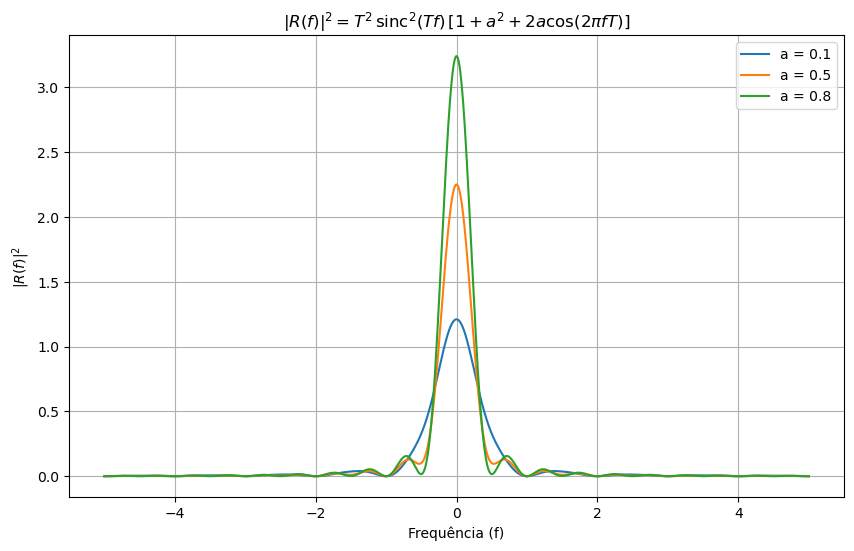

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
T = 1.0                      # duração do pulso
a_values = [0.1, 0.5, 0.8]     # diferentes valores de a
f = np.linspace(-5, 5, 1000)   # eixo de frequência

# Transformada de Fourier do pulso retangular de duração T


plt.figure(figsize=(10, 6))

for a in a_values:
    # Calcula o termo de interferência:
    interference = 1 + a * np.exp(-1j * 2 * np.pi * f * T)
    # Norma do espectro do sinal
    R_mag2 = (T * np.sinc(T * f))**2 * np.abs(interference)**2
    plt.plot(f, R_mag2, label=f'a = {a}')


plt.title(r'$|R(f)|^2 = T^2\,\mathrm{sinc}^2(Tf)\,[1+a^2+2a\cos(2\pi fT)]$')
plt.xlabel('Frequência (f)')
plt.ylabel(r'$|R(f)|^2$')
plt.legend()
plt.grid(True)
plt.show()

<a id="analise"></a>
# 2. Análise de sinais determinísticos e aleatórios

<a id="equivalente"></a>
## 2.1 Equivalente passa-baixa

Qualquer sinal de banda limitada em alta frequência pode ser representado por um sinal complexo em baixa frequência, denominado **equivalente passa-baixas**. Essa representação é particularmente conveniente, pois permite trabalhar com taxas de amostragem menores no processamento digital, em comparação com aquelas que seriam necessárias para manipular diretamente sinais em alta frequência.

É importante destacar que as características de um sinal e as de um canal de comunicação nem sempre coincidem. Por essa razão, torna-se necessário o processo de **modulação**, no qual uma *portadora* em alta frequência tem suas propriedades (amplitude, fase ou frequência) modificadas de acordo com a informação contida no sinal em baixa frequência.

Por definição, sinais em alta frequência são **reais** no domínio do tempo. Consequentemente, seus espectros apresentam **simetria hermitiana**, isto é, a parte negativa da frequência é o conjugado da parte positiva. Já o equivalente passa-baixas, por ser um sinal **complexo**, não precisa apresentar essa simetria.

Um sinal real pode, portanto, ser representado apenas pela parte positiva de seu espectro. Esse intervalo de frequências em que o espectro é não nulo é denominado **suporte de frequência** do sinal. Em contrapartida, sinais complexos não podem ser descritos apenas pela parte positiva do espectro, uma vez que não apresentam simetria espectral.

Por fim, define-se a **largura de banda** como sendo a metade do suporte de frequência do sinal. Essa definição é válida tanto para sinais reais quanto para sinais complexos no tempo.

Definamos **sinal analítico** ou **pré-envoltória**, correspondente a $x(t)$ como sendo o sinal $x_+(t)$, com espectro $X_+(f)$. Esse sinal contém apenas as frequências positivas, e seu espectro não é Hermitiano, de forma que, em geral, $x(t)$ é um sinal complexo e pode ser escrito como:

\begin{equation}
\begin{aligned}
x_+(t) &= \mathcal{F}^{-1}[X_+(f)] \\
       &= \mathcal{F}^{-1}[X(f)u_{-1}(f)] \\
       &= x(t) \star \left( \tfrac{1}{2}\delta(t) + j \tfrac{1}{2\pi t} \right) \\
       &= \tfrac{1}{2}x(t) + \tfrac{j}{2}\,\hat{x}(t)
\end{aligned}
\tag{2.1-1}
\end{equation}

onde $\hat{x}(t) = \frac{1}{\pi t} \star x(t)$ é a *transformada de Hilbert* de $x(t)$, obtida ao introduzir uma defasagem de $-\frac{\pi}{2}$ e $\frac{\pi}{2}$ às frequências positivas e negativas de $x(t)$ respectivamente, de modo que tenhamos, no domínio da frequência:

\begin{equation}
\mathcal{F}[\hat{x}(t)] = -j \, \text{sgn}(f) \, X(f)
\tag{2.1-2}
\end{equation}

---

### Transformada de Hilbert da função retangular

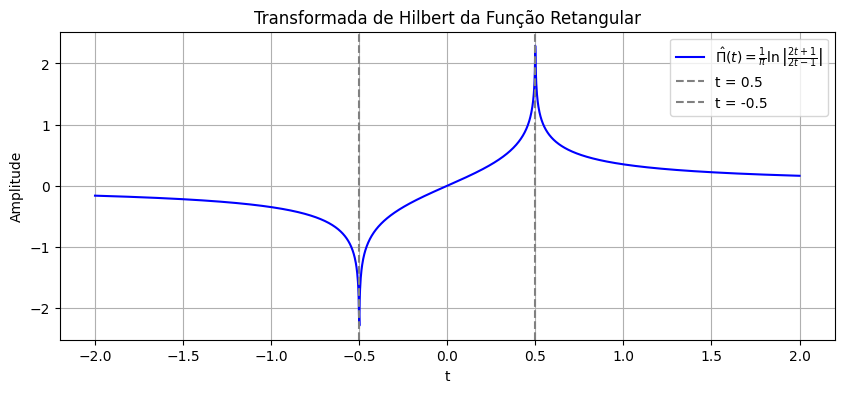

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ======================================================
# 1. Plot da Transformada de Hilbert da função retangular
# ======================================================


t = np.linspace(-2, 2, 2000)

# A função retangular:
rect = np.where(np.abs(t) < 0.5, 1.0, 0.0)
rect[np.isclose(np.abs(t), 0.5)] = 0.5

# Calculando a transformada de Hilbert da função retangular usando a expressão analítica:
#    H{Π(t)} = (1/π) * ln |(2t+1)/(2t-1)|
denom = 2*t - 1
vals  = (2*t + 1) / denom
threshold = 1e-6  # se |2t-1| for menor que esse valor, consideramos ponto de singularidade

hilbert_transform = (1/np.pi) * np.log(np.abs(vals))
# Onde o denominador se aproxima de zero, evitamos extrapolar:
hilbert_transform = np.where(np.abs(denom) < threshold, np.nan, hilbert_transform)

# Plotando a transformada de Hilbert
plt.figure(figsize=(10, 4))
plt.plot(t, hilbert_transform, color='blue', label=r'$\hat{\Pi}(t)=\frac{1}{\pi}\ln\left|\frac{2t+1}{2t-1}\right|$')
plt.axvline(0.5, color='gray', linestyle='--', label='t = 0.5')
plt.axvline(-0.5, color='gray', linestyle='--', label='t = -0.5')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Transformada de Hilbert da Função Retangular')
plt.legend()
plt.grid(True)
plt.show()

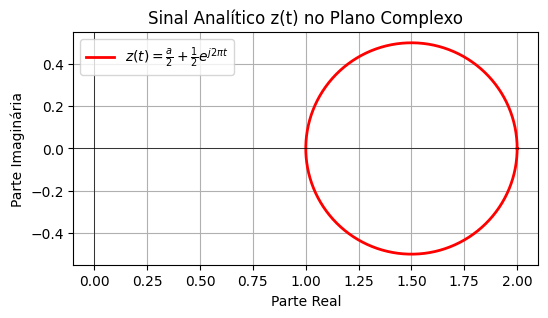

In [ ]:
a = 3.0


t2 = np.linspace(0, 1, 500)

# Cálculo do sinal analítico:
# z(t) = a/2 + (1/2)*exp(j2πt)
z = (a/2) + (0.5) * np.exp(1j * 2 * np.pi * t2)

# Plotando no plano complexo
plt.figure(figsize=(6, 6))
plt.plot(z.real, z.imag, 'r-', linewidth=2, label=r'$z(t)=\frac{a}{2}+\frac{1}{2}e^{j2\pi t}$')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Sinal Analítico z(t) no Plano Complexo')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()

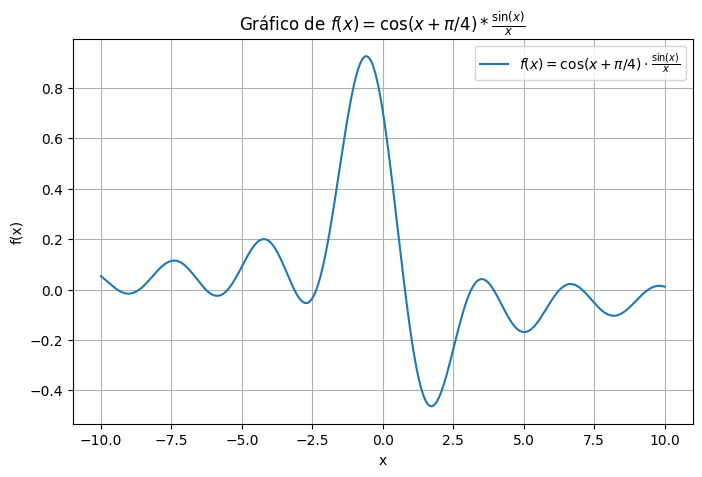

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o intervalo para x (interpretado como pivt)
x = np.linspace(-10, 10, 2000)


f = np.where(np.abs(x) < 1e-8, 
             np.cos(np.pi/4),    
             np.cos(x + np.pi/4) * (np.sin(x) / x))

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, f, label=r"$f(x)=\cos(x+\pi/4)\cdot\frac{\sin(x)}{x}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfico de $f(x)=\cos(x+\pi/4)*\\frac{\\sin(x)}{x}$")
plt.legend()
plt.grid(True)
plt.show()

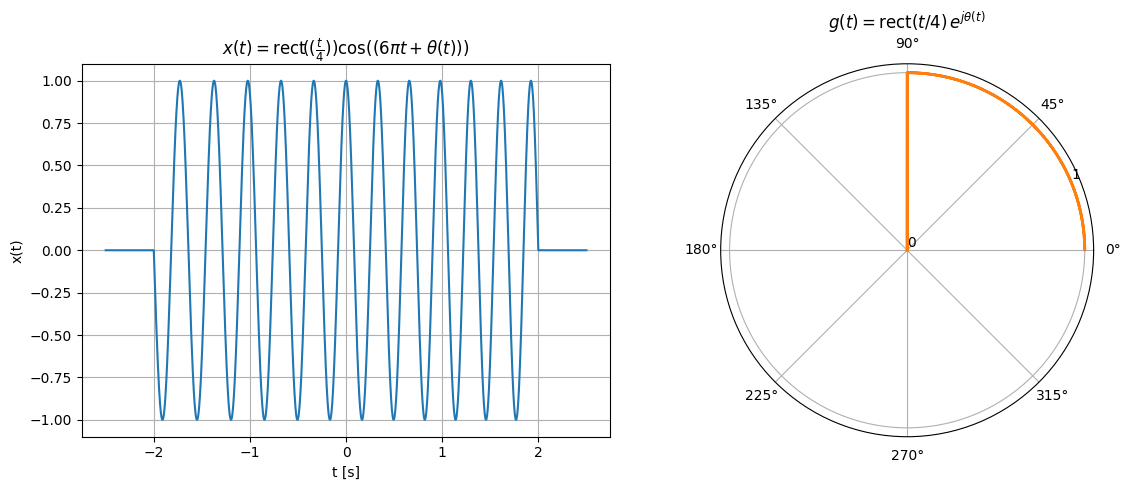

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-2.5, 2.5, 2000)

rect = np.where(np.abs(t)<2, 1, 0)
theta = np.where(np.abs(t)<2, (np.pi/8)*t**2, 0)
x = rect*np.cos(6*np.pi*t + theta)

fig = plt.figure(figsize=(12,5))


ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(t, x, 'C0')
ax1.set_xlabel("t [s]")
ax1.set_ylabel("x(t)")

ax1.set_title(r"$x(t)=\mathrm{rect}\!\bigl(\tfrac{t}{4}\bigr)\cos\!\bigl(6\pi t + \theta(t)\bigr)$".replace(r"\tfrac", r"\frac").replace(r"\bigl", "(").replace(r"\bigr", ")"))
ax1.grid(True)


ax2 = fig.add_subplot(1, 2, 2, projection='polar')
ax2.plot(theta, rect, 'C1', lw=2)
ax2.set_title(r"$g(t)=\mathrm{rect}(t/4)\,e^{j\theta(t)}$")
ax2.set_rticks([0,1])
ax2.grid(True)

plt.tight_layout()
plt.show()

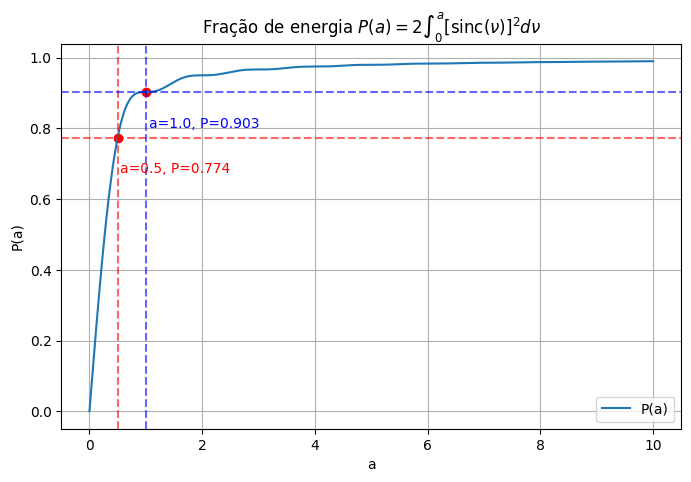

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def P(a):
    integrand = lambda nu: np.sinc(nu)**2
    return 2 * quad(integrand, 0, a)[0]

# valores de interesse
a_vals = np.linspace(0, 10, 2000)
P_vals = [P(a) for a in a_vals]

# pontos destacados
a0, a1 = 0.5, 1.0
P0, P1 = P(a0), P(a1)

plt.figure(figsize=(8, 5))
plt.plot(a_vals, P_vals, label='P(a)')
plt.scatter([a0, a1], [P0, P1], color='red')
plt.axvline(a0, color='red', linestyle='--', alpha=0.6)
plt.axhline(P0, color='red', linestyle='--', alpha=0.6)
plt.text(a0+0.05, P0-0.1, f'a=0.5, P={P0:.3f}', color='red')

plt.axvline(a1, color='blue', linestyle='--', alpha=0.6)
plt.axhline(P1, color='blue', linestyle='--', alpha=0.6)
plt.text(a1+0.05, P1-0.1, f'a=1.0, P={P1:.3f}', color='blue')

plt.title('Fração de energia $P(a)=2\\int_0^a [\\mathrm{sinc}(\\nu)]^2 d\\nu$')
plt.xlabel('a')
plt.ylabel('P(a)')
plt.grid(True)
plt.legend()
plt.show()

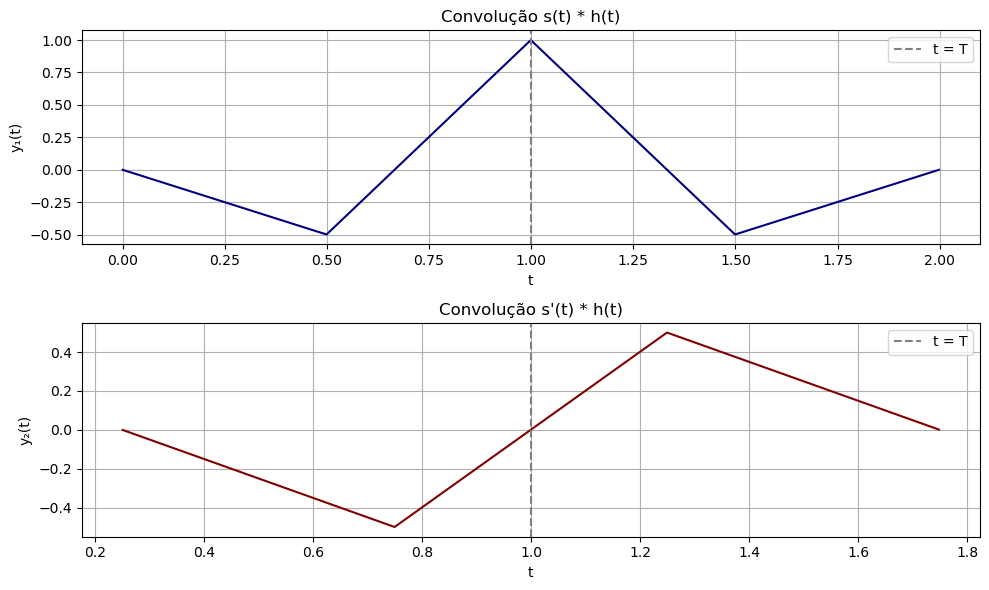

y₁(T) ≈ 0.9970  (esperado = Eb = 1.0)
y₂(T) ≈ 0.0020  (esperado = 0)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
Eb = 1.0        # Energia do bit
T  = 1.0        # Duração do pulso
fs = 1000       # Taxa de amostragem (samples por segundo)
dt = 1/fs       # Passo de tempo

# 1) Define s(t): pulso NRZ de energia Eb
t_s = np.arange(-T/2, T/2, dt)
s = np.where((t_s >= -T/2) & (t_s < 0),
             +np.sqrt(Eb),
             np.where((t_s >= 0) & (t_s < T/2),
                      -np.sqrt(Eb),
                      0.0))

# 2) Define s'(t): pulso retangular unitário de duração T/2
t_sp = np.arange(-T/4, T/4, dt)
s_prime = np.where((t_sp >= -T/4) & (t_sp < T/4),
                   1.0,
                   0.0)

# 3) Define h(t) = s(T - t) como time–reverse de s(t)
t_h = np.arange(T/2, 3*T/2, dt)
h = s[::-1]

# 4) Convolução (multiplica por dt para aproximar a integral contínua)
y1 = dt * np.convolve(s,      h, mode='full')
y2 = dt * np.convolve(s_prime, h, mode='full')

# 5) Gera eixos de tempo com comprimento igual ao do resultado da convolução
start_y1 = t_s[0] + t_h[0]
t_y1 = start_y1 + np.arange(len(y1)) * dt

start_y2 = t_sp[0] + t_h[0]
t_y2 = start_y2 + np.arange(len(y2)) * dt

# 6) Plota os resultados
plt.figure(figsize=(10, 6))

plt.subplot(2,1,1)
plt.plot(t_y1, y1, color='navy')
plt.axvline(T, color='gray', linestyle='--', label='t = T')
plt.title("Convolução s(t) * h(t)")
plt.xlabel("t")
plt.ylabel("y₁(t)")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t_y2, y2, color='maroon')
plt.axvline(T, color='gray', linestyle='--', label='t = T')
plt.title("Convolução s'(t) * h(t)")
plt.xlabel("t")
plt.ylabel("y₂(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 7) Valores em t = T
idx1 = np.argmin(np.abs(t_y1 - T))
idx2 = np.argmin(np.abs(t_y2 - T))

print(f"y₁(T) ≈ {y1[idx1]:.4f}  (esperado = Eb = {Eb})")
print(f"y₂(T) ≈ {y2[idx2]:.4f}  (esperado = 0)")



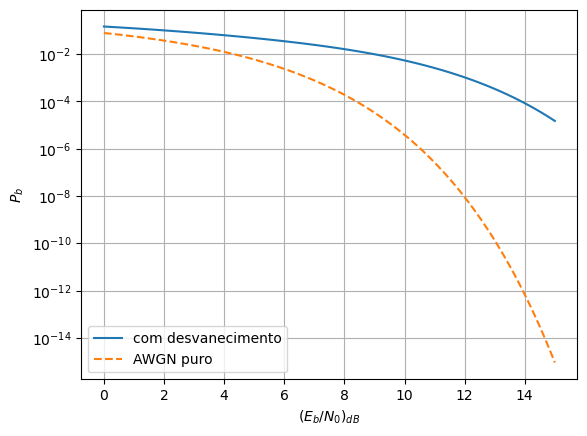

In [1]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

def Q(x):
    return 0.5*erfc(x/np.sqrt(2))

# distribuição de A
a_vals = np.array([1.0, 0.5])
p_vals = np.array([4/7, 3/7])

# faixa de Eb/N0 em dB
snr_db = np.linspace(0, 15, 100)
snr_lin = 10**(snr_db/10)

Pb = []
for gamma in snr_lin:
    args = a_vals * np.sqrt(2*gamma)
    Pb.append(np.dot(p_vals, Q(args)))
Pb = np.array(Pb)

plt.semilogy(snr_db, Pb, label='com desvanecimento')
plt.semilogy(snr_db, Q(np.sqrt(2*snr_lin)), '--', label='AWGN puro')
plt.xlabel(r'$(E_b/N_0)_{dB}$')
plt.ylabel('$P_b$')
plt.legend()
plt.grid(True, which='both')
plt.show()